In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [40]:
md_crash_df = pd.read_csv('Maryland_Statewide_Vehicle_Crashes (1).csv')

In [ ]:
md_crash_df.head()

,YEAR,QUARTER,LIGHT_DESC,LIGHT_CODE,COUNTY_DESC,COUNTY_NO,MUNI_DESC,MUNI_CODE,JUNCTION_DESC,JUNCTION_CODE,...,FEET_MILES_FLAG_DESC,FEET_MILES_FLAG,DISTANCE_DIR_FLAG,REFERENCE_NO,REFERENCE_TYPE_CODE,REFERENCE_SUFFIX,REFERENCE_ROAD_NAME,LATITUDE,LONGITUDE,LOCATION
0,2020,Q2,Daylight,1.00,Baltimore,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.277263,-76.503693,POINT (-76.5036932 39.27726285)
1,2022,Q2,Dark Lights On,3.00,Montgomery,15.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.992210,-77.097021,POINT (-77.097020666667 38.9922095)
2,2020,Q4,NaN,6.02,Baltimore,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.323620,-76.503080,POINT (-76.503080116667 39.323620083333)
3,2022,Q1,Daylight,1.00,Baltimore,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.411213,-76.628028,POINT (-76.628028425147 39.411213105087)
4,2022,Q2,Dark Lights On,3.00,Queen Anne's,17.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.974880,-76.281090,POINT (-76.28109 38.97488)


In [ ]:
md_crash_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878343 entries, 0 to 878342
Data columns (total 55 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   YEAR                   878343 non-null  int64  
 1   QUARTER                878343 non-null  object 
 2   LIGHT_DESC             841025 non-null  object 
 3   LIGHT_CODE             878343 non-null  float64
 4   COUNTY_DESC            878329 non-null  object 
 5   COUNTY_NO              878329 non-null  float64
 6   MUNI_DESC              0 non-null       float64
 7   MUNI_CODE              659957 non-null  float64
 8   JUNCTION_DESC          760119 non-null  object 
 9   JUNCTION_CODE          791512 non-null  float64
 10  COLLISION_TYPE_DESC    878343 non-null  object 
 11  COLLISION_TYPE_CODE    878343 non-null  int64  
 12  SURF_COND_DESC         789107 non-null  object 
 13  SURF_COND_CODE         791512 non-null  float64
 14  LANE_CODE              668083 non-nu

In [ ]:
new_cols = ['YEAR','QUARTER','LIGHT_DESC', 'COUNTY_NO',	'COLLISION_TYPE_DESC',	'REPORT_NO',	'REPORT_TYPE',	'ACC_DATE',	'ACC_TIME',		'AGENCY_CODE',	'RTE_NO',	'MAINROAD_NAME', 'LATITUDE', 'LONGITUDE', 'LOCATION']
crash_df = md_crash_df[new_cols]
crash_df.info()
len(crash_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878343 entries, 0 to 878342
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 878343 non-null  int64  
 1   QUARTER              878343 non-null  object 
 2   LIGHT_DESC           841025 non-null  object 
 3   COUNTY_NO            878329 non-null  float64
 4   COLLISION_TYPE_DESC  878343 non-null  object 
 5   REPORT_NO            878343 non-null  object 
 6   REPORT_TYPE          767610 non-null  object 
 7   ACC_DATE             878343 non-null  int64  
 8   ACC_TIME             878343 non-null  object 
 9   AGENCY_CODE          878343 non-null  object 
 10  RTE_NO               702722 non-null  float64
 11  MAINROAD_NAME        791503 non-null  object 
 12  LATITUDE             878343 non-null  float64
 13  LONGITUDE            878343 non-null  float64
dtypes: float64(4), int64(2), object(8)
memory usage: 93.8+ MB


878343

In [ ]:
crash_df = crash_df[crash_df['YEAR'] < 2020]
crash_df = crash_df[crash_df['YEAR'] > 2015]

In [ ]:
crash_df.head()

,YEAR,QUARTER,LIGHT_DESC,COUNTY_NO,COLLISION_TYPE_DESC,REPORT_NO,REPORT_TYPE,ACC_DATE,ACC_TIME,AGENCY_CODE,RTE_NO,MAINROAD_NAME,LATITUDE,LONGITUDE
12,2017,Q2,Daylight,24.0,Single Vehicle,ADI7910042,Injury Crash,20170507,10:39:00,BALTIMORE,NaN,NaN,39.282928,-76.635215
45,2017,Q2,Daylight,15.0,Same Direction Sideswipe,MCP3048000X,Property Damage Crash,20170602,12:05:00,MONTGOMERY,NaN,NaN,38.990928,-77.103005
57,2017,Q4,Dark Lights On,16.0,Single Vehicle,CE3909001P,Injury Crash,20171223,19:25:00,LAUREL,NaN,NaN,39.093621,-76.842587
59,2017,Q4,Daylight,15.0,Other,MCP1433001D,Property Damage Crash,20171012,14:57:00,MONTGOMERY,NaN,NaN,39.089463,-77.158510
87,2018,Q1,Daylight,2.0,Single Vehicle,AB36760083,Property Damage Crash,20180111,16:00:00,ANNAPOLIS,NaN,NaN,38.980300,-76.524909


In [ ]:
crash_df = crash_df.dropna()
crash_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362125 entries, 3553 to 823386
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 362125 non-null  int64  
 1   QUARTER              362125 non-null  object 
 2   LIGHT_DESC           362125 non-null  object 
 3   COUNTY_NO            362125 non-null  float64
 4   COLLISION_TYPE_DESC  362125 non-null  object 
 5   REPORT_NO            362125 non-null  object 
 6   REPORT_TYPE          362125 non-null  object 
 7   ACC_DATE             362125 non-null  int64  
 8   ACC_TIME             362125 non-null  object 
 9   AGENCY_CODE          362125 non-null  object 
 10  RTE_NO               362125 non-null  float64
 11  MAINROAD_NAME        362125 non-null  object 
 12  LATITUDE             362125 non-null  float64
 13  LONGITUDE            362125 non-null  float64
dtypes: float64(4), int64(2), object(8)
memory usage: 41.4+ MB


In [ ]:
crash_df

,YEAR,QUARTER,LIGHT_DESC,COUNTY_NO,COLLISION_TYPE_DESC,REPORT_NO,REPORT_TYPE,ACC_DATE,ACC_TIME,AGENCY_CODE,RTE_NO,MAINROAD_NAME,LATITUDE,LONGITUDE
3553,2016,Q2,Daylight,24.0,Same Movement Angle,ADJ619002B,Property Damage Crash,20160517,06:00:00,BALTIMORE,147.0,HARFORD RD,39.352170,-76.561586
6252,2016,Q3,Daylight,24.0,Other,ADI1140056,Property Damage Crash,20160703,15:00:00,BALTIMORE,140.0,REISTERSTOWN RD,39.336613,-76.673808
9983,2017,Q4,Daylight,16.0,Other,HB04380008,Property Damage Crash,20171027,18:05:00,PGPARK,221.0,MCLAIN AVE #1,38.930621,-76.865437
11681,2016,Q4,Daylight,15.0,Single Vehicle,MCP30050019,Injury Crash,20161012,11:15:00,MONTGOMERY,1274.0,WHEATON LA,39.033970,-77.032113
11843,2017,Q2,Daylight,24.0,Same Direction Rear End,ADH2870003,Property Damage Crash,20170524,12:10:00,BALTIMORE,151.0,ERDMAN AVE,39.313917,-76.570124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823382,2019,Q3,Daylight,8.0,Same Direction Rear End,MDTA1582000H,Property Damage Crash,20190824,11:30:00,MDTA,301.0,CRAIN HWY,38.363845,-76.980606
823383,2019,Q3,Daylight,15.0,Head On Left Turn,MCP1475002C,Injury Crash,20190922,10:00:00,MONTGOMERY,340.0,RUSSELL AVE,39.151418,-77.207443
823384,2016,Q2,Daylight,3.0,Single Vehicle,AE5643000S,Property Damage Crash,20160510,06:09:00,BACOPD,2937.0,HILLTOP RD S,39.259988,-76.757913
823385,2018,Q4,Daylight,3.0,Same Direction Left Turn,MSP6836008R,Property Damage Crash,20181016,09:59:00,MSP,695.0,BALTO BELTWAY,39.298405,-76.742785


In [ ]:
len(crash_df)

362125

In [ ]:
crash_df.to_csv('Dropped_crash_data.csv')
print('Done')

Done


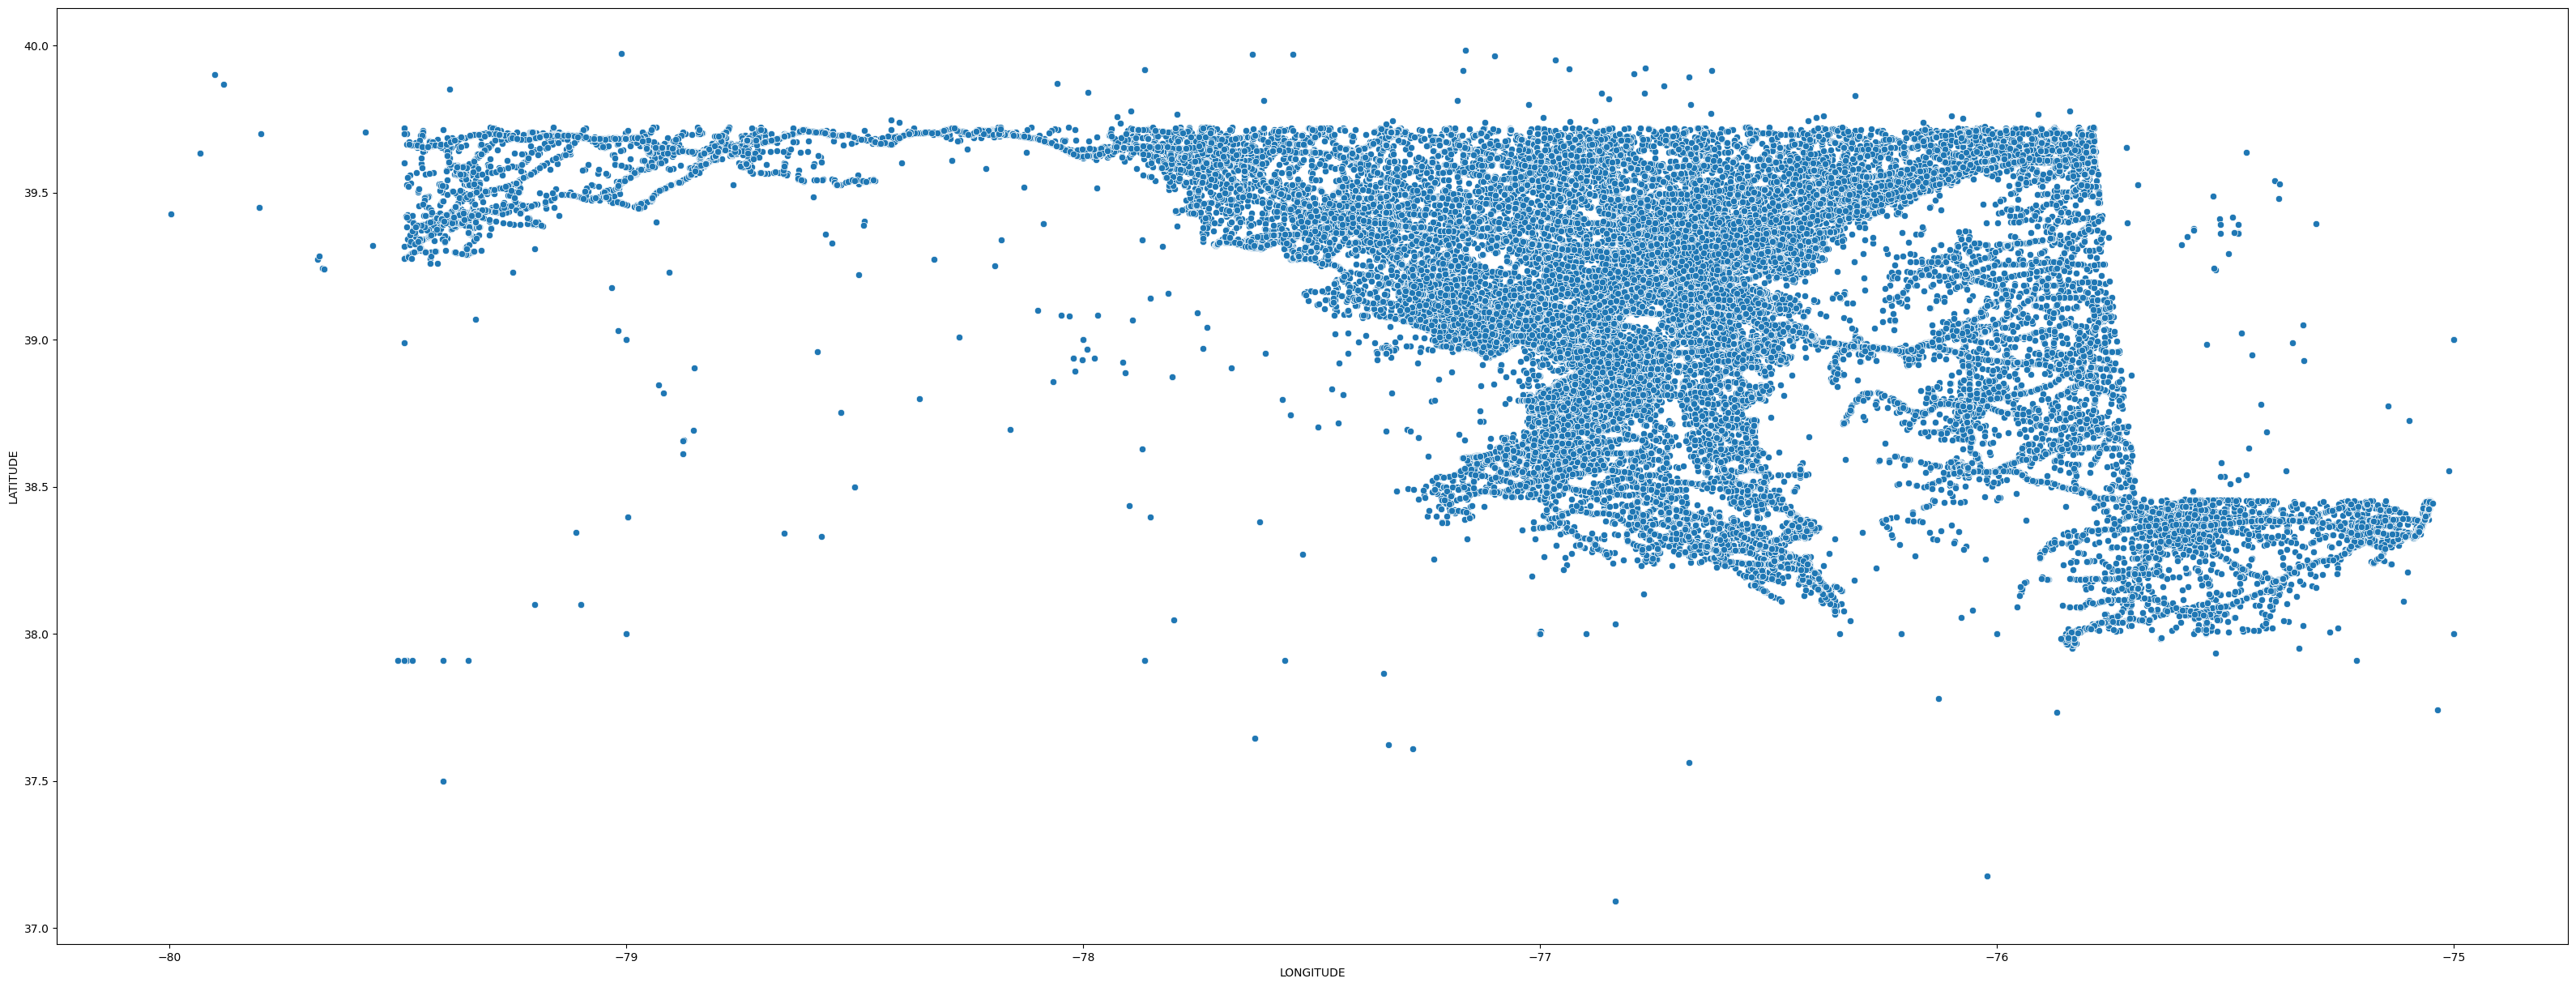

In [ ]:
a = crash_df[['LATITUDE','LONGITUDE']]
plt.figure(figsize=(40,15))
ax = sns.scatterplot(y=a.LATITUDE, x=a.LONGITUDE)
#ax = sns.heatmap(a)

plt.show()
